In [1]:
import sys
import os

# Add the root of the project to the path
sys.path.append(os.path.abspath("D:\\burtm\\Visual_studio_code\\PD_related_projects"))

In [3]:
import pandas as pd

source_path="D:\\burtm\\Visual_studio_code\\PD_related_projects"
source_file="icdar_train_df_20250514_175905.csv"
train_df = pd.read_csv(f"{source_path}\\outputs\\preprocessed_data\\{source_file}")

In [4]:
train_df.head()

,writer,isEng,same_text,file_name,male,train,index
0,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0
1,1,0,1,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,1
2,1,1,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,2
3,1,1,1,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,3
4,2,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,4


In [ ]:
train_df_expanded = pd.DataFrame(sum(train_df.apply(image_processing.process_row, axis=1), []))

train_df_expanded.head(10)

,writer,isEng,same_text,file_name,male,train,index,x,y,x2,y2,n_cc
0,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,0,493,493,986,111
0,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,493,493,986,986,96
0,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,986,493,1479,986,90
0,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,1479,493,1972,986,99
0,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,1972,493,2465,986,99


In [ ]:
train_df_expanded = train_df_expanded.reset_index(drop=True)
train_df_expanded.head(10)

,writer,isEng,same_text,file_name,male,train,index,x,y,x2,y2,n_cc
0,190,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,1,1,756,988,494,1482,988,315
1,24,1,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,94,990,495,1485,990,311
2,26,1,1,D:\download\PD project\datasets\ICDAR 2013 - G...,1,1,103,494,1976,988,2470,309
3,190,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,1,1,756,494,494,988,988,303
4,160,1,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,638,1482,494,1976,988,297


In [ ]:
#save the full dataset if you don't want to filter patches
'''
file_path=source_path+"\\outputs\\preprocessed_data\\icdar_train_df_patches_complete_cc.csv"
train_df_expanded.to_csv(file_path, index=False)
print(f"File saved: {file_path}")'''


File saved: D:\burtm\Visual_studio_code\PD_related_projects\outputs\preprocessed_data\icdar_train_df_patches_complete_cc.csv


In [9]:
#i select the m patches per file that have the highest number of cc
m=5
train_df_expanded_sorted = train_df_expanded.sort_values(by='n_cc', ascending=False)
train_df_expanded = train_df_expanded_sorted.groupby('file_name').head(m)   # Select top m patches per writer
#If a group (i.e., a specific 'writer') in the DataFrame has fewer than m rows, 
# the head(m) method will simply return all the rows available for that group. It does not raise an error or fill in additional rows

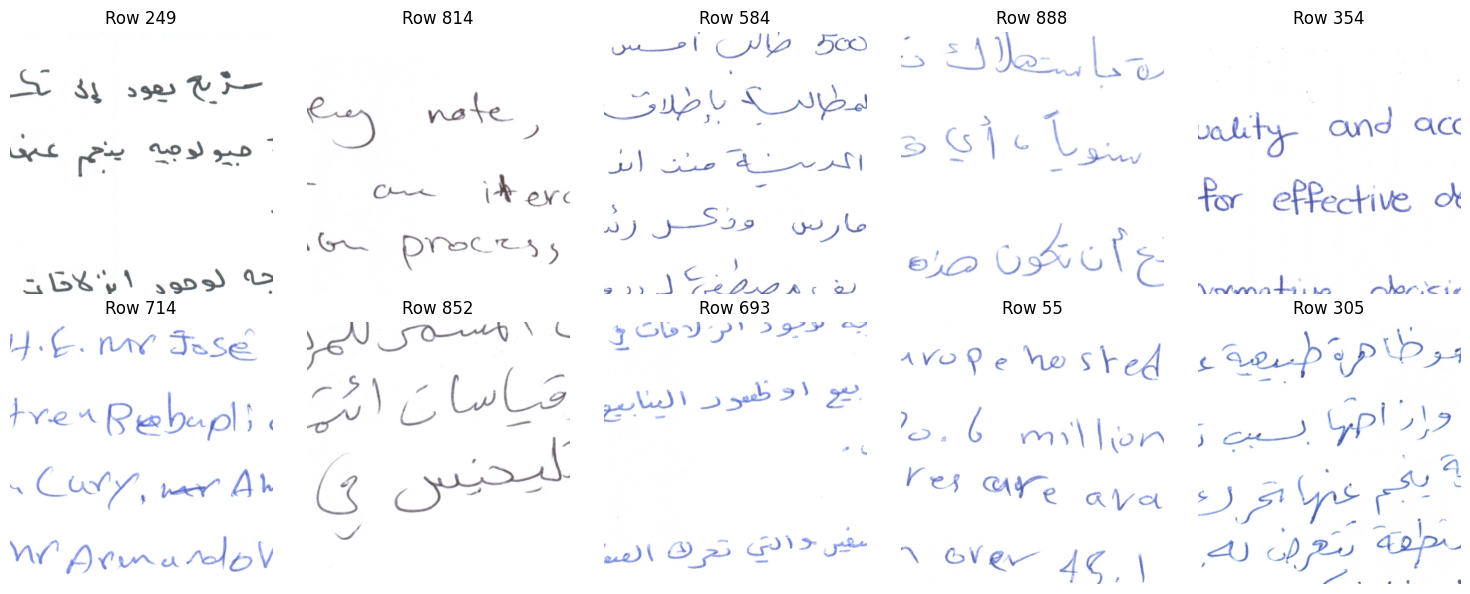

In [12]:
visualization.plot_cropped_sections(train_df_expanded)

In [ ]:
# The number of patches per writer, should be 5*4
len(train_df_expanded)/282

20.0

In [18]:
tests.check_randomization(train_df_expanded)
tests.check_grouping(train_df_expanded)
tests.check_occurrences(train_df_expanded,count=20)

Number of rows where train == 1: 5060
Fraction of rows where train == 1: 0.90
The train column is constant for all writers.
Each unique writer value occurs on exactly 4 rows.


In [21]:
train_df_expanded.loc[1]

,writer,isEng,same_text,file_name,male,train,index,x,y,x2,y2,n_cc
1,1,0,1,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,1,986,986,1479,1479,108
1,1,0,1,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,1,1479,986,1972,1479,96
1,1,0,1,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,1,493,1479,986,1972,95
1,1,0,1,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,1,1479,1479,1972,1972,95
1,1,0,1,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,1,493,986,986,1479,90


In [19]:
tests.compare(train_df_expanded,train_df)

4935


KeyError: 4935

In [11]:
file_path=source_path+"\\outputs\\preprocessed_data\\icdar_train_df_cc_5patches_perName.csv"
train_df_expanded.to_csv(file_path, index=False)
print(f"File saved: {file_path}")

File saved: D:\burtm\Visual_studio_code\PD_related_projects\outputs\preprocessed_data\icdar_train_df_cc_5patches_perName.csv


In [12]:
import pyarrow as pa
import pyarrow.parquet as pq
from datetime import datetime
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Your metadata
metadata = {
    'author': 'Andrea Morelli',
    'date': timestamp,
    'description': 'dividing images in 25th and counting the number of ccs, using a threshold of 10. I extract the 5 patches with more ccs for each unique file'
}

# Convert DataFrame to pyarrow Table
table = pa.Table.from_pandas(train_df_expanded)

# Convert metadata to bytes and attach to schema
# Parquet metadata must be a dict of bytes
meta_bytes = {k: str(v).encode('utf-8') for k, v in metadata.items()}
table = table.replace_schema_metadata(meta_bytes)

# Write to Parquet file
pq.write_table(table, 'icdar_train_df_cc_5patches_perName.parquet')

# easy access

In [16]:
def reload_modules():
    import importlib
    import utils.image_processing as image_processing
    import utils.file_IO as file_IO
    import utils.visualization as visualization
    import utils.tests as tests

    importlib.reload(file_IO)
    importlib.reload(image_processing)
    importlib.reload(visualization)
    importlib.reload(tests)

    return image_processing, file_IO, visualization, tests
image_processing, file_IO, visualization, tests = reload_modules()